In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

iris=load_iris()
#iris.keys()
iris_data = iris.data

iris_label = iris.target

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df.head(3)
#iris_df['label'] = iris.target
#iris_df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
iris_train_X, iris_test_X, iris_train_Y, iris_test_Y = train_test_split(iris_df, iris_label, test_size=0.3, random_state=15000)

iris_train_X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
33,5.5,4.2,1.4,0.2
127,6.1,3.0,4.9,1.8
54,6.5,2.8,4.6,1.5
49,5.0,3.3,1.4,0.2


In [4]:
dt_clf = DecisionTreeClassifier(random_state=11) #DecisionTree_Classifier -> dt_clf

dt_clf.fit(iris_train_X, iris_train_Y)

DecisionTreeClassifier(random_state=11)

In [5]:
pred = dt_clf.predict(iris_test_X)

In [6]:
from sklearn.metrics import accuracy_score
print('accuracy: {0:.4f}'.format(accuracy_score(iris_test_Y,pred)))

accuracy: 0.9778


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(iris_train_X , iris_train_Y)
dt_pred = dt_clf.predict(iris_test_X)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(iris_test_Y, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(iris_train_X , iris_train_Y)
rf_pred = rf_clf.predict(iris_test_X)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(iris_test_Y, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(iris_train_X , iris_train_Y)
lr_pred = lr_clf.predict(iris_test_X)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(iris_test_Y, lr_pred)))


DecisionTreeClassifier 정확도: 0.9778
RandomForestClassifier 정확도:0.9556
LogisticRegression 정확도: 0.9778


## Decision tree training and visualization

sklearn => sci-kit learn module <br>
DecisionTree Classifier : 의사결정트리

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [13]:
features = list(iris_train_X.columns[:-1])
features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

In [16]:
X = iris_train_X[features]
# y = iris_train_Y['target']
y = iris_train_Y

In [17]:
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='Decision_tree.dot',
    feature_names=features,
    rounded=True,
    filled=True
)

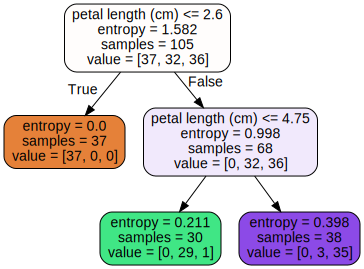

In [19]:
import graphviz
from IPython.display import display
with open('wine_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='wine_tree', directory='./',cleanup=True)
display(dot)

## Result of Decision Tree

In [22]:
X_test = iris_test_X[features]
y_test = iris_test_Y

In [23]:
y_pred = tree_clf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
# precision : 정밀도
# recall : 재현율
# https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8

[[13  0  0]
 [ 0 15  3]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91        18
           2       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



<hr>

## <h1> gini index vs entropy

Decision Tree에서 탐색기준을 Gini index vs Entropy를 사용한다.
Gini SCORE는 지니계수의 계산식을 차용하여 정보이득량(불순도)을 계산하며

```
#Gini SCORE
def giniscore(node):
    nodesum, percents = calcpercent(node)
    score = round(1 - sum([i**2 for i in percents.values()]), 3) #node의 개수:3
    print('Gini Score for node {} : {}'.format(node, score))
    return score
```
Entropy SCORE는 열역학에서의 엔트로피의 계산식을 차용하여 정보이득량(불순도)을 계산한다. 

```
#Entropy SCORE

def entropyscore(node):
    nodesum, percents = calcpercent(node)
    score = round(sum([-i*log(i,2) for i in percents.values()]), 3) #node의 개수:3
    print('Entropy Score for node {} : {}'.format(node, score))
    return score
```
코드 출처 : https://thatascience.com/learn-machine-learning/gini-entropy/



# 의사결정트리 training with iris Data



iris데이터에 대해
<br>criterion는 'entropy' / 'gini' 둘다 수행  
max_depth는 2\~4까지 수행
<p>Iris data sets consists of 3 different types of irises’<br> (Setosa, Versicolour, and Virginica) petal and sepal length, <br> stored in a 150x4 numpy.ndarray</p>

## <h1>DATA LOAD</h1>

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

pd : Panda Module, np : numpy module

In [28]:
import numpy as np
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names']+['target'])
iris_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## <h1>SPLIT</h1>

<p>iris의 데이터들을 학습용 데이터셋과 학습결과 확인용 데이터 셋으로 나눈다.</p>

In [29]:
from sklearn.model_selection import train_test_split
iris_train_set, iris_test_set = train_test_split(iris_pd, test_size=0.2, random_state=123)
print(iris_train_set.info())
print(iris_test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 130 to 109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   target             120 non-null    float64
dtypes: float64(5)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 72 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   petal length (cm)  30 non-null     float64
 3   petal width (cm)   30 non-null     float64
 4   target             30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB
None


<p>학습데이터 중 가장 상단의 30개의 데이터를 출력(앞에서 30개)</p>

In [30]:
iris_train_set.head(30)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
130,7.4,2.8,6.1,1.9,2.0
119,6.0,2.2,5.0,1.5,2.0
29,4.7,3.2,1.6,0.2,0.0
0,5.1,3.5,1.4,0.2,0.0
62,6.0,2.2,4.0,1.0,1.0
93,5.0,2.3,3.3,1.0,1.0
131,7.9,3.8,6.4,2.0,2.0
5,5.4,3.9,1.7,0.4,0.0
16,5.4,3.9,1.3,0.4,0.0
82,5.8,2.7,3.9,1.2,1.0


##<h1>TRAIN with Decision Tree(Entropy)</h1>

공통 import 사항

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris 데이터에서 학습에 필요한 데이터셋으로 나누기<br>
fit 함수에서는 데이터와 판단 데이터를 나눠서 넣어야 하기 때문

In [32]:
iris_features = list(iris_train_set.columns[:-1])
iris_features
iris_x = iris_train_set[iris_features]
iris_y = iris_train_set['target']

탐색 기준이 entropy(정보 증가량)

case 1) 탐색 기준이 entropy(정보 증가량)이고 최대 node의 깊이가 2인 경우

In [33]:
tree_1_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [34]:
tree_1_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [35]:
export_graphviz(
    tree_1_clf,
    out_file='iris_tree_1.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

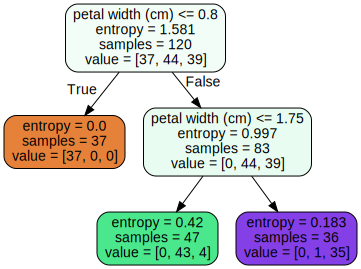

In [36]:
import graphviz
from IPython.display import display
with open('iris_tree_1.dot') as f1:
    dot_graph_1 = f1.read()
dot_1 = graphviz.Source(dot_graph_1)
dot_1.format = 'png'
dot_1.render(filename='iris_tree_1', directory='./',cleanup=True)
display(dot_1)

case 2) 탐색 기준이 entropy(정보 증가량)이고 최대 node의 깊이가 3인 경우

In [38]:
tree_2_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
tree_2_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
export_graphviz(
    tree_2_clf,
    out_file='iris_tree_2.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

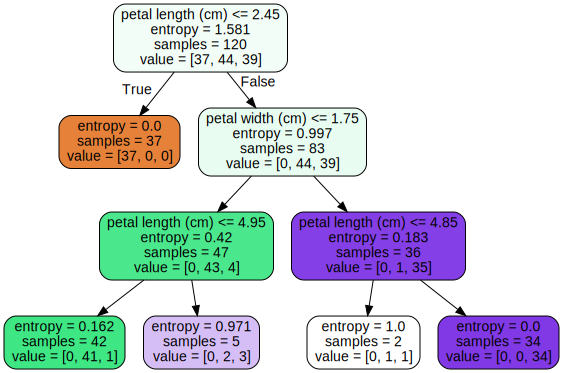

In [41]:
import graphviz
from IPython.display import display
with open('iris_tree_2.dot') as f2:
    dot_graph_2 = f2.read()
dot_2 = graphviz.Source(dot_graph_2)
dot_2.format = 'png'
dot_2.render(filename='iris_tree_2', directory='./',cleanup=True)
display(dot_2)

case 3) 탐색 기준이 entropy(정보 증가량)이고 최대 node의 깊이가 4인 경우

In [42]:
tree_3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
tree_3_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
export_graphviz(
    tree_3_clf,
    out_file='iris_tree_3.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

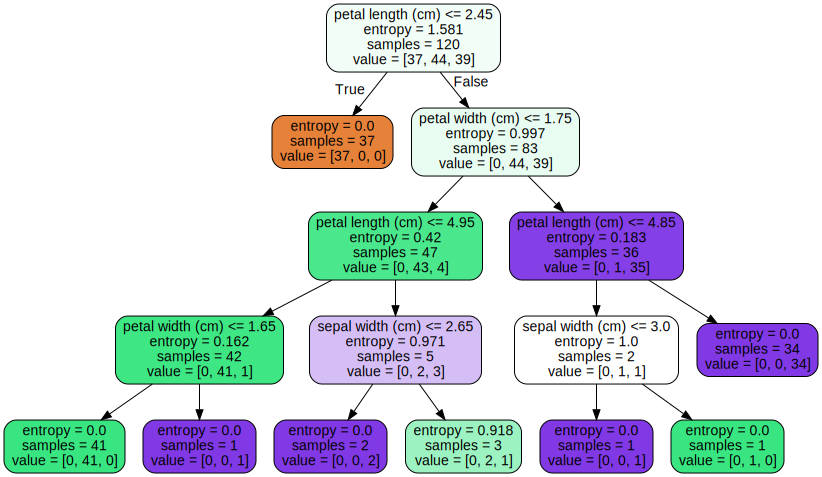

In [45]:
import graphviz
from IPython.display import display
with open('iris_tree_3.dot') as f3:
    dot_graph_3 = f3.read()
dot_3 = graphviz.Source(dot_graph_3)
dot_3.format = 'png'
dot_3.render(filename='iris_tree_3', directory='./',cleanup=True)
display(dot_3)

## <h1>TRAIN with Decision Tree(Gini)</h1>

In [46]:
from sklearn.tree import DecisionTreeClassifier

탐색 기준이 gini

In [47]:
tree_4_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [48]:
tree_4_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(max_depth=2)

In [49]:
export_graphviz(
    tree_4_clf,
    out_file='iris_tree_4.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

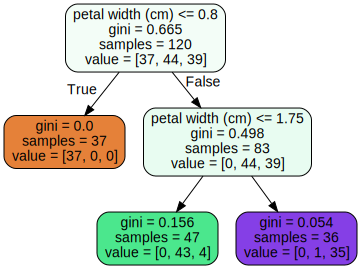

In [50]:
import graphviz
from IPython.display import display
with open('iris_tree_4.dot') as f4:
    dot_graph_4 = f4.read()
dot_4 = graphviz.Source(dot_graph_4)
dot_4.format = 'png'
dot_4.render(filename='iris_tree_4', directory='./',cleanup=True)
display(dot_4)

In [51]:
tree_5_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [52]:
tree_5_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(max_depth=3)

In [53]:
export_graphviz(
    tree_5_clf,
    out_file='iris_tree_5.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

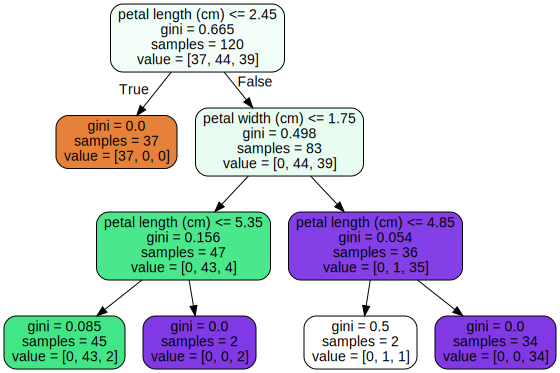

In [54]:
import graphviz
from IPython.display import display
with open('iris_tree_5.dot') as f5:
    dot_graph_5 = f5.read()
dot_5 = graphviz.Source(dot_graph_5)
dot_5.format = 'png'
dot_5.render(filename='iris_tree_5', directory='./',cleanup=True)
display(dot_5)

In [55]:
tree_6_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [56]:
tree_6_clf.fit(iris_x,iris_y)

DecisionTreeClassifier(max_depth=4)

In [57]:
export_graphviz(
    tree_6_clf,
    out_file='iris_tree_6.dot',
    feature_names=iris_features,
    rounded=True,
    filled=True
)

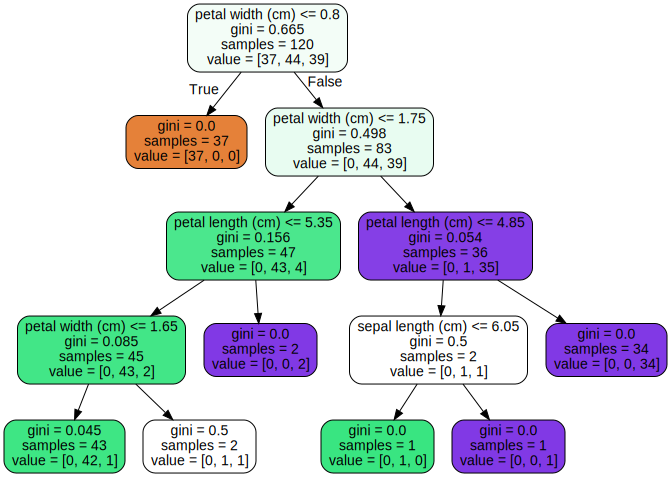

In [58]:
import graphviz
from IPython.display import display
with open('iris_tree_6.dot') as f6:
    dot_graph_6 = f6.read()
dot_6 = graphviz.Source(dot_graph_6)
dot_6.format = 'png'
dot_6.render(filename='iris_tree_6', directory='./',cleanup=True)
display(dot_6)

## <h1>TEST</h1>

In [59]:
iris_X_test = iris_test_set[iris_features]
iris_y_test = iris_test_set['target']

In [60]:
y_pred_1 = tree_1_clf.predict(iris_X_test)
y_pred_2 = tree_2_clf.predict(iris_X_test)
y_pred_3 = tree_3_clf.predict(iris_X_test)
y_pred_4 = tree_4_clf.predict(iris_X_test)
y_pred_5 = tree_5_clf.predict(iris_X_test)
y_pred_6 = tree_6_clf.predict(iris_X_test)

Result 1)<br>
entropy & depth = 2

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_1))
print(classification_report(iris_y_test,y_pred_1))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Result 2)<br>
entropy & depth = 3

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_2))
print(classification_report(iris_y_test,y_pred_2))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Result 3)<br>
entropy & depth = 4

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_3))
print(classification_report(iris_y_test,y_pred_3))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Result 4)<br>
gini & depth = 2

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_4))
print(classification_report(iris_y_test,y_pred_4))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Result 5)<br>
gini & depth = 3

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_5))
print(classification_report(iris_y_test,y_pred_5))

[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.75      1.00      0.86         6
         2.0       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



Result 6)<br>
gini & depth = 4

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(iris_y_test, y_pred_6))
print(classification_report(iris_y_test,y_pred_6))

[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.75      1.00      0.86         6
         2.0       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



# **Fit Function**


Sklearn fit함수의 정의및 구현확인<br>
과제와 상관 없는 부분

In [67]:
iris_x #X data => 판정을 제외한 나머지 데이터

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [68]:
iris_y #y data => 판단 부분

130    2.0
119    2.0
29     0.0
0      0.0
62     1.0
      ... 
17     0.0
98     1.0
66     1.0
126    2.0
109    2.0
Name: target, Length: 120, dtype: float64

In [69]:
#==================================================================================#
#Scikit-learn tree fit function#
#usage : xxx_clf.fit(x,y)# x => 대상 데이터 y => 판단 데이터
#과제와 관계 X#
 def fit(self, X, y, sample_weight=None, check_input=True,
            X_idx_sorted=None):

        random_state = check_random_state(self.random_state)

        if self.ccp_alpha < 0.0:
            raise ValueError("ccp_alpha must be greater than or equal to 0")

        if check_input:
            # Need to validate separately here.
            # We can't pass multi_ouput=True because that would allow y to be
            # csr.
            check_X_params = dict(dtype=DTYPE, accept_sparse="csc")
            check_y_params = dict(ensure_2d=False, dtype=None)
            X, y = self._validate_data(X, y,
                                       validate_separately=(check_X_params,
                                                            check_y_params))
            if issparse(X):
                X.sort_indices()

                if X.indices.dtype != np.intc or X.indptr.dtype != np.intc:
                    raise ValueError("No support for np.int64 index based "
                                     "sparse matrices")

        # Determine output settings
        n_samples, self.n_features_ = X.shape
        is_classification = is_classifier(self)

        y = np.atleast_1d(y)
        expanded_class_weight = None

        if y.ndim == 1:
            # reshape is necessary to preserve the data contiguity against vs
            # [:, np.newaxis] that does not.
            y = np.reshape(y, (-1, 1))

        self.n_outputs_ = y.shape[1]

        if is_classification:
            check_classification_targets(y)
            y = np.copy(y)

            self.classes_ = []
            self.n_classes_ = []

            if self.class_weight is not None:
                y_original = np.copy(y)

            y_encoded = np.zeros(y.shape, dtype=np.int)
            for k in range(self.n_outputs_):
                classes_k, y_encoded[:, k] = np.unique(y[:, k],
                                                       return_inverse=True)
                self.classes_.append(classes_k)
                self.n_classes_.append(classes_k.shape[0])
            y = y_encoded

            if self.class_weight is not None:
                expanded_class_weight = compute_sample_weight(
                    self.class_weight, y_original)

            self.n_classes_ = np.array(self.n_classes_, dtype=np.intp)

        if getattr(y, "dtype", None) != DOUBLE or not y.flags.contiguous:
            y = np.ascontiguousarray(y, dtype=DOUBLE)

        # Check parameters
        max_depth = (np.iinfo(np.int32).max if self.max_depth is None
                     else self.max_depth)
        max_leaf_nodes = (-1 if self.max_leaf_nodes is None
                          else self.max_leaf_nodes)

        if isinstance(self.min_samples_leaf, numbers.Integral):
            if not 1 <= self.min_samples_leaf:
                raise ValueError("min_samples_leaf must be at least 1 "
                                 "or in (0, 0.5], got %s"
                                 % self.min_samples_leaf)
            min_samples_leaf = self.min_samples_leaf
        else:  # float
            if not 0. < self.min_samples_leaf <= 0.5:
                raise ValueError("min_samples_leaf must be at least 1 "
                                 "or in (0, 0.5], got %s"
                                 % self.min_samples_leaf)
            min_samples_leaf = int(ceil(self.min_samples_leaf * n_samples))

        if isinstance(self.min_samples_split, numbers.Integral):
            if not 2 <= self.min_samples_split:
                raise ValueError("min_samples_split must be an integer "
                                 "greater than 1 or a float in (0.0, 1.0]; "
                                 "got the integer %s"
                                 % self.min_samples_split)
            min_samples_split = self.min_samples_split
        else:  # float
            if not 0. < self.min_samples_split <= 1.:
                raise ValueError("min_samples_split must be an integer "
                                 "greater than 1 or a float in (0.0, 1.0]; "
                                 "got the float %s"
                                 % self.min_samples_split)
            min_samples_split = int(ceil(self.min_samples_split * n_samples))
            min_samples_split = max(2, min_samples_split)

        min_samples_split = max(min_samples_split, 2 * min_samples_leaf)

        if isinstance(self.max_features, str):
            if self.max_features == "auto":
                if is_classification:
                    max_features = max(1, int(np.sqrt(self.n_features_)))
                else:
                    max_features = self.n_features_
            elif self.max_features == "sqrt":
                max_features = max(1, int(np.sqrt(self.n_features_)))
            elif self.max_features == "log2":
                max_features = max(1, int(np.log2(self.n_features_)))
            else:
                raise ValueError("Invalid value for max_features. "
                                 "Allowed string values are 'auto', "
                                 "'sqrt' or 'log2'.")
        elif self.max_features is None:
            max_features = self.n_features_
        elif isinstance(self.max_features, numbers.Integral):
            max_features = self.max_features
        else:  # float
            if self.max_features > 0.0:
                max_features = max(1,
                                   int(self.max_features * self.n_features_))
            else:
                max_features = 0

        self.max_features_ = max_features

        if len(y) != n_samples:
            raise ValueError("Number of labels=%d does not match "
                             "number of samples=%d" % (len(y), n_samples))
        if not 0 <= self.min_weight_fraction_leaf <= 0.5:
            raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
        if max_depth <= 0:
            raise ValueError("max_depth must be greater than zero. ")
        if not (0 < max_features <= self.n_features_):
            raise ValueError("max_features must be in (0, n_features]")
        if not isinstance(max_leaf_nodes, numbers.Integral):
            raise ValueError("max_leaf_nodes must be integral number but was "
                             "%r" % max_leaf_nodes)
        if -1 < max_leaf_nodes < 2:
            raise ValueError(("max_leaf_nodes {0} must be either None "
                              "or larger than 1").format(max_leaf_nodes))

        if sample_weight is not None:
            sample_weight = _check_sample_weight(sample_weight, X, DOUBLE)

        if expanded_class_weight is not None:
            if sample_weight is not None:
                sample_weight = sample_weight * expanded_class_weight
            else:
                sample_weight = expanded_class_weight

        # Set min_weight_leaf from min_weight_fraction_leaf
        if sample_weight is None:
            min_weight_leaf = (self.min_weight_fraction_leaf *
                               n_samples)
        else:
            min_weight_leaf = (self.min_weight_fraction_leaf *
                               np.sum(sample_weight))

        min_impurity_split = self.min_impurity_split
        if min_impurity_split is not None:
            warnings.warn("The min_impurity_split parameter is deprecated. "
                          "Its default value has changed from 1e-7 to 0 in "
                          "version 0.23, and it will be removed in 0.25. "
                          "Use the min_impurity_decrease parameter instead.",
                          FutureWarning)

            if min_impurity_split < 0.:
                raise ValueError("min_impurity_split must be greater than "
                                 "or equal to 0")
        else:
            min_impurity_split = 0

        if self.min_impurity_decrease < 0.:
            raise ValueError("min_impurity_decrease must be greater than "
                             "or equal to 0")

        # Build tree
        criterion = self.criterion
        if not isinstance(criterion, Criterion):
            if is_classification:
                criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
                                                         self.n_classes_)
            else:
                criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
                                                         n_samples)

        SPLITTERS = SPARSE_SPLITTERS if issparse(X) else DENSE_SPLITTERS

        splitter = self.splitter
        if not isinstance(self.splitter, Splitter):
            splitter = SPLITTERS[self.splitter](criterion,
                                                self.max_features_,
                                                min_samples_leaf,
                                                min_weight_leaf,
                                                random_state)

        if is_classifier(self):
            self.tree_ = Tree(self.n_features_,
                              self.n_classes_, self.n_outputs_)
        else:
            self.tree_ = Tree(self.n_features_,
                              # TODO: tree should't need this in this case
                              np.array([1] * self.n_outputs_, dtype=np.intp),
                              self.n_outputs_)

        # Use BestFirst if max_leaf_nodes given; use DepthFirst otherwise
        if max_leaf_nodes < 0:
            builder = DepthFirstTreeBuilder(splitter, min_samples_split,
                                            min_samples_leaf,
                                            min_weight_leaf,
                                            max_depth,
                                            self.min_impurity_decrease,
                                            min_impurity_split)
        else:
            builder = BestFirstTreeBuilder(splitter, min_samples_split,
                                           min_samples_leaf,
                                           min_weight_leaf,
                                           max_depth,
                                           max_leaf_nodes,
                                           self.min_impurity_decrease,
                                           min_impurity_split)

        builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)

        if self.n_outputs_ == 1 and is_classifier(self):
            self.n_classes_ = self.n_classes_[0]
            self.classes_ = self.classes_[0]

        self._prune_tree()

        return self

IndentationError: unexpected indent (<ipython-input-69-327a169585ff>, line 5)